# Importação das bibliotecas

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

# Carregamento dos dataset de resultados

In [12]:
#usuario= "igorcapeletti"
usuario= "igorubuntu"

#nome_pasta_resultado= 'resultados1'
nome_pasta_resultado= 'resultados2'
#nome_pasta_resultado= 'resultados_af_xdp1'
raiz= f"/home/{usuario}/github/tcc_eBPF_XDP/experimentos/{nome_pasta_resultado}"

df_gerador = pd.read_csv(f'{raiz}/resultado_geral_gerador.csv', sep=',', engine='python')
df_perf = pd.read_csv(f'{raiz}/resultado_geral_perf.csv', sep=',', engine='python')
df_sar = pd.read_csv(f'{raiz}/resultado_geral_sar.csv', sep=',', engine='python')

df= df_gerador
#df = pd.concat([df_gerador,df_perf], sort = False)
print(df.columns)

format_imagens= '.jpg'


Index(['combined', 'algoritmo', 'packet_size', 'hook_ebpf', 'var_ip',
       'timeout', 'rx_packets', 'rx_packet_rate_avg', 'rx_packet_rate'],
      dtype='object')


In [7]:
lista_combined= [1,2,4,8]
lista_for= [0,100,200,400,800,1600,3200,6400,12800]
lista_hook_xdp= ['xdpgeneric','xdpdvr']
lista_pacotes= [64,128,256,512,1024,1500]

# Resultados do gerador

### As avaliações de ***Latência***, ***Vazão*** e ***uso de CPU*** serão avaliados em 4 grupos gerais:
#### 1. Número de filas TX/RX de processamento
#### 2. Modos de hook XDP
#### 3. Tamanho dos laços de repetição dos algoritmos
#### 4. Tamanho dos pacotes
---

## 1. Número de filas TX/RX de processamento

### 1.1 Qual a ***Vazão*** obtida ao aumentar as filas TX/RX de processamento?

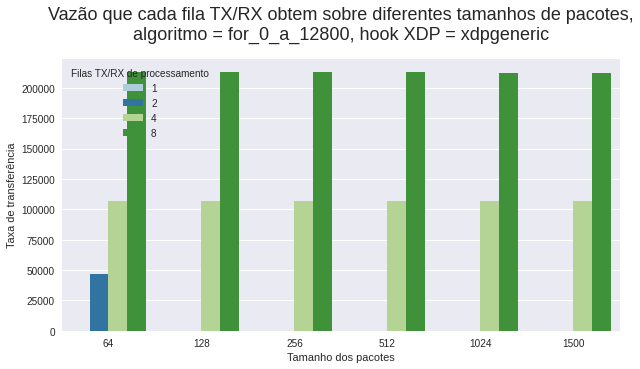

In [21]:
algoritmo= 'for_0_a_12800'
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.algoritmo == algoritmo]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes tamanhos de pacotes,\nalgoritmo = {algoritmo}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Tamanho dos pacotes")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_packet_size@algoritmo_{algoritmo}_hook_ebpf_{hook_ebpf}{format_imagens}')

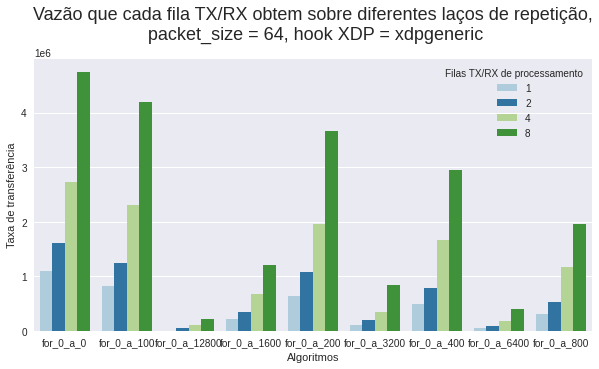

In [22]:
packet_size= 64
hook_ebpf= 'xdpgeneric'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes laços de repetição,\n packet_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Algoritmos")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_algoritmo@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

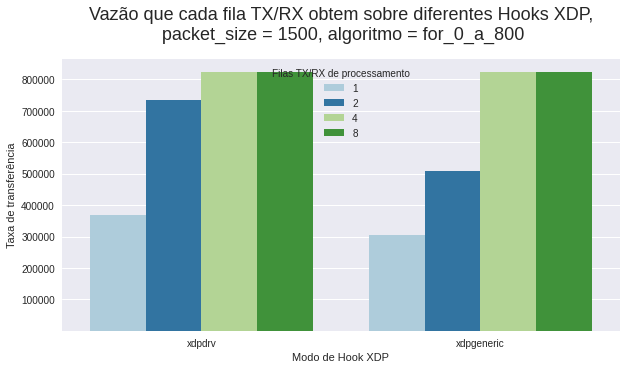

In [41]:
packet_size= 1500
algoritmo= 'for_0_a_800'

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'combined'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão que cada fila TX/RX obtem sobre diferentes Hooks XDP,\n packet_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel("Modo de Hook XDP")
ax.legend(title = 'Filas TX/RX de processamento')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_combined_para_dif_hook_ebpf@packet_size_{packet_size}_algoritmo_{algoritmo}{format_imagens}')

### 1.2 Qual a ***Latência*** obtida ao aumentar as filas TX/RX de processamento?

### 1.3 Qual o ***uso de CPU*** obtido ao aumentar as filas TX/RX de processamento?

## 2. Modos de hook XDP

### 2.1 Qual a ***Vazão*** obtida por cada modo de hook XDP?

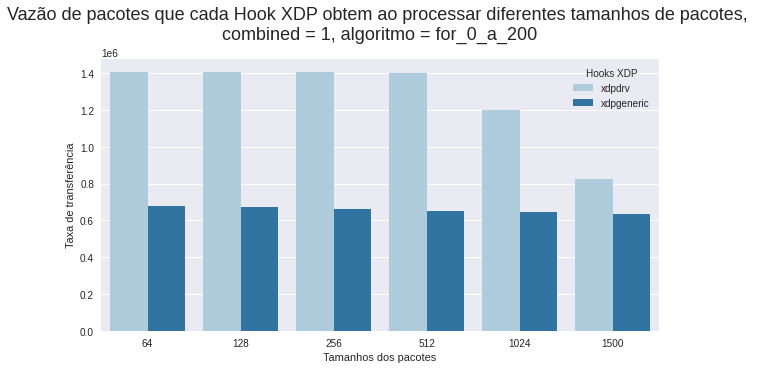

In [11]:
combined=1
algoritmo= 'for_0_a_200'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem ao processar diferentes tamanhos de pacotes, \ncombined = {combined}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Tamanhos dos pacotes')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_tam_packets@combined{combined}_algoritmo_{algoritmo}{format_imagens}')

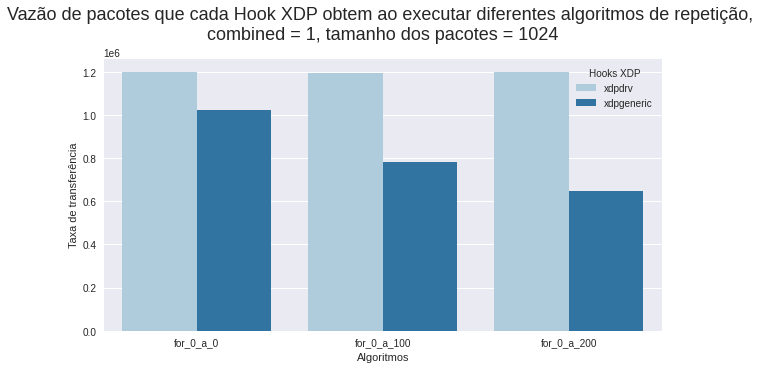

In [19]:
combined=1
packet_size= 1024

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.packet_size == packet_size]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem ao executar diferentes algoritmos de repetição, \ncombined = {combined}, tamanho dos pacotes = {packet_size}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Algoritmos')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_{hue}_para_dif_{eixo_x}@combined_{combined}_packet_size_{packet_size}{format_imagens}')

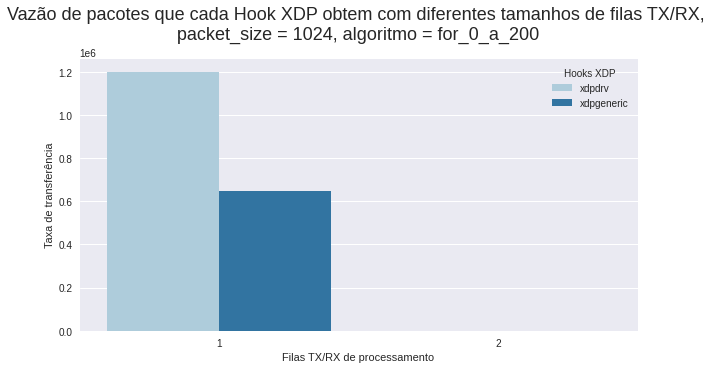

In [18]:
packet_size= 1024
algoritmo= 'for_0_a_200'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'hook_ebpf'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Hook XDP obtem com diferentes tamanhos de filas TX/RX, \npacket_size = {packet_size}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Hooks XDP")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_hooks_para_dif_combined@packet_size{packet_size}_algoritmo_{algoritmo}{format_imagens}')

### 2.2 Qual a ***Latência*** obtida por cada modo de hook XDP?

### 2.3 Qual o ***uso de CPU*** por modo de hook XDP?

## 3. Tamanho dos laços de repetição dos algoritmos

### 3.1 Qual a ***Vazão*** obtida por laço de repetição

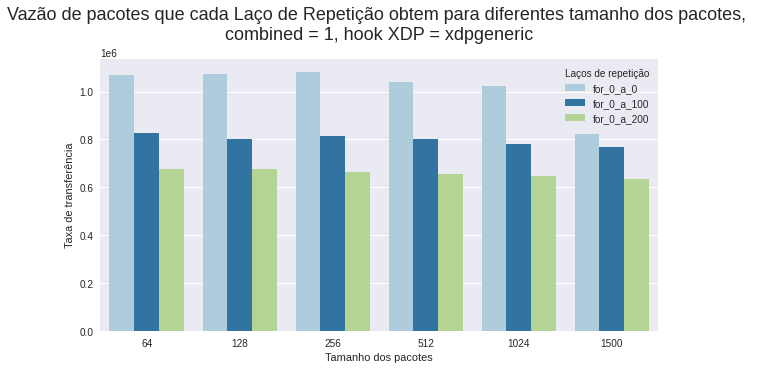

In [23]:
combined=1
hook_ebpf= 'xdpgeneric'

eixo_x= 'packet_size'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem para diferentes tamanho dos pacotes, \ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Tamanho dos pacotes')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_packet_size@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

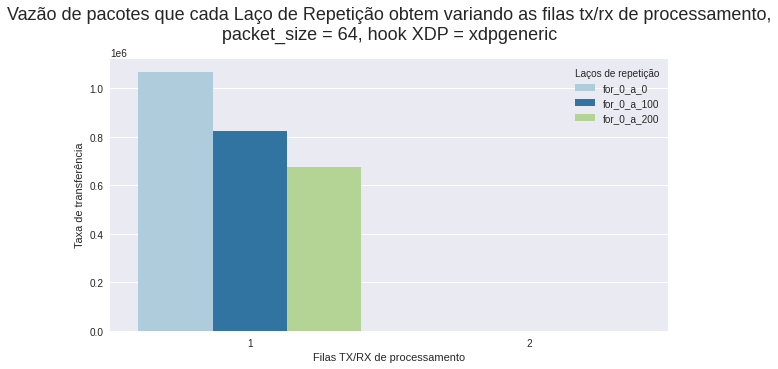

In [22]:
packet_size=64
hook_ebpf= 'xdpgeneric'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando as filas tx/rx de processamento,\npacket_size = {packet_size}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_combined@packet_size_{packet_size}_hook_ebpf_{hook_ebpf}{format_imagens}')

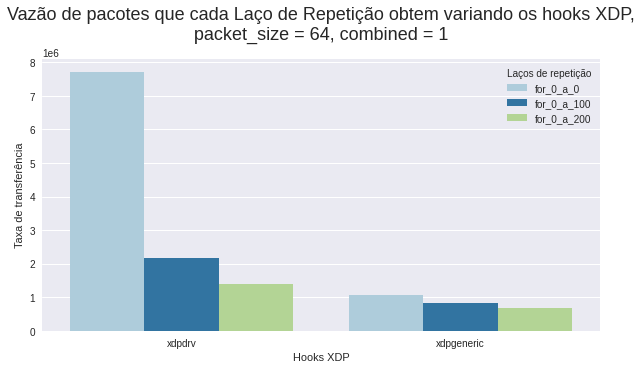

In [25]:
packet_size=64
combined= 1

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'algoritmo'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.packet_size == packet_size]
df_pergunta1= df_pergunta1[df_pergunta1.combined == combined]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes que cada Laço de Repetição obtem variando os hooks XDP,\npacket_size = {packet_size}, combined = {combined}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Hooks XDP')
ax.legend(title = "Laços de repetição")
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_for_para_dif_hook_ebpf@packet_size_{packet_size}_combined_{combined}{format_imagens}')

### 3.2 Qual a ***Latência*** obtida por laço de repetição

### 3.3 Qual o ***uso de CPU*** por laço de repetição

## 4. Tamanho dos Pacotes

### 4.1 Qual a ***Vazão*** obtida por tamanho de pacote 

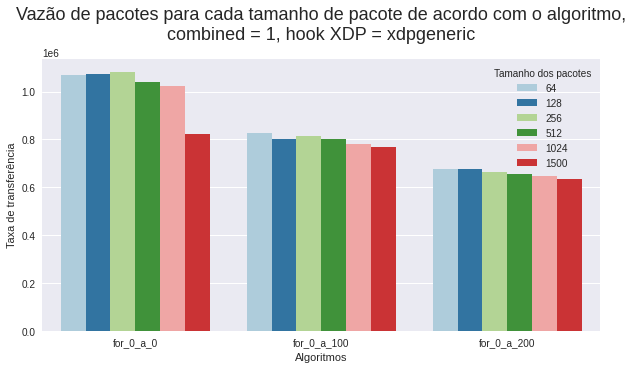

In [34]:
combined=1
hook_ebpf= 'xdpgeneric'

eixo_x= 'algoritmo'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com o algoritmo,\ncombined = {combined}, hook XDP = {hook_ebpf}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Algoritmos')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_for@combined_{combined}_hook_ebpf_{hook_ebpf}{format_imagens}')

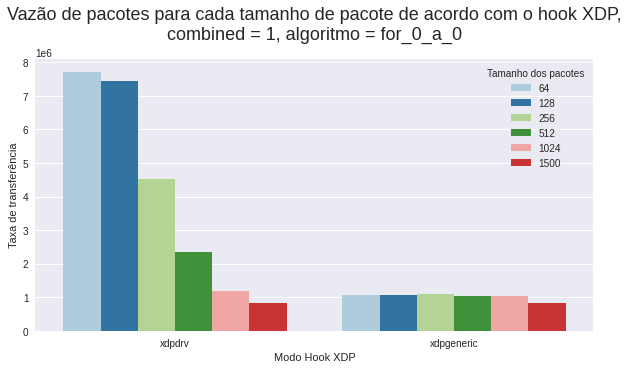

In [40]:
combined=1
algoritmo= 'for_0_a_0'

eixo_x= 'hook_ebpf'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.combined == combined]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com o hook XDP,\ncombined = {combined}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Modo Hook XDP')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_hook_ebpf@combined_{combined}_algoritmo_{algoritmo}{format_imagens}')

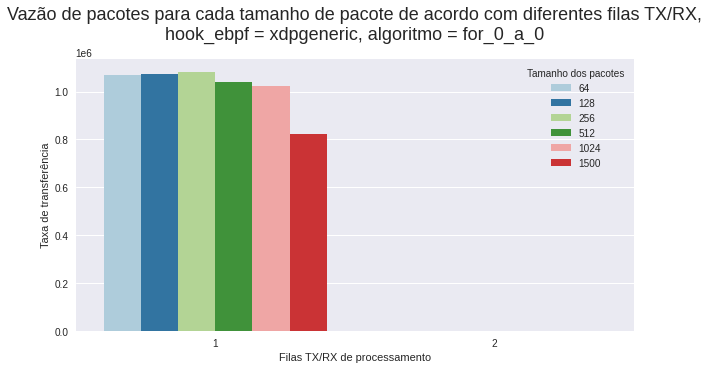

In [43]:
hook_ebpf= 'xdpgeneric'
algoritmo= 'for_0_a_0'

eixo_x= 'combined'
eixo_y= 'rx_packet_rate'
hue= 'packet_size'

plt.rc('figure', figsize=(10, 5))
df_pergunta1= df[df.hook_ebpf == hook_ebpf]
df_pergunta1= df_pergunta1[df_pergunta1.algoritmo == algoritmo]
df_pergunta1= df_pergunta1.sort_values(by=[hue,eixo_x], ascending=True)
df_pergunta1= df_pergunta1[[eixo_x, eixo_y, hue]]

ax = sns.barplot(y=eixo_y, x=eixo_x, hue=hue, data=df_pergunta1, palette='Paired');
ax.set_title(f'Vazão de pacotes para cada tamanho de pacote de acordo com diferentes filas TX/RX,\nhook_ebpf = {hook_ebpf}, algoritmo = {algoritmo}', fontsize=18, pad=20);
ax.set_ylabel('Taxa de transferência')
ax.set_xlabel('Filas TX/RX de processamento')
ax.legend(title = 'Tamanho dos pacotes')
save_image= ax.get_figure()
save_image.savefig(f'{raiz}/barra_dif_packet_size_para_dif_hook_ebpf@hook_ebpf_{hook_ebpf}_algoritmo_{algoritmo}{format_imagens}')

### 4.2 Qual a ***Latência*** obtida por tamanho de pacote 

### 4.3 Qual o ***uso de CPU*** obtido por tamanho de pacote 